In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Segmentation of Credit Card Customers/'

/content/gdrive/My Drive/Colab Notebooks/Segmentation of Credit Card Customers


# Import and Clean the Data

In [0]:
credit_card_data = pd.read_csv("CC_GENERAL.csv")

In [5]:
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Getting information about data set

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data audit Report

In [0]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [8]:
summary=credit_card_data.drop('CUST_ID',axis=1).apply(lambda x: var_summary(x)).T
summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


## Cleaning the Data

### Null value Treatment

CREDIT_LIMIT and MINIMUM_PAYMENTS columns have null values. These columns require null value treatment.

Replacing null values with median

In [0]:
credit_card_data['CREDIT_LIMIT'].fillna(credit_card_data['CREDIT_LIMIT'].median(),inplace=True)
credit_card_data['MINIMUM_PAYMENTS'].fillna(credit_card_data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [10]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None of the columns now have null values.

###  Extreme value Treatment
- Doing outlier treatment as there are variables having extreme values. 

In [0]:
#Handling Outliers
def outlier_capping(x):
    x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99), inplace=True)
    return x

credit_card_data = credit_card_data[credit_card_data.columns.difference(['CUST_ID'])].apply(lambda x: outlier_capping(x))

## Data Audit report after cleaning the data

In [12]:
summary=credit_card_data.apply(lambda x: var_summary(x)).T
summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333
CASH_ADVANCE_TRX,8950.0,0.0,2.756000e+04,3.079330,0.000000,5.523724,3.051153e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,15.000000,29.000000,29.000000
CREDIT_LIMIT,8950.0,0.0,4.004458e+07,4474.254540,3000.000000,3551.099746,1.261031e+07,500.000000,500.000000,1000.000000,1200.000000,1600.000000,3000.000000,6500.000000,9500.000000,12000.000000,17000.000000,17000.000000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
MINIMUM_PAYMENTS,8950.0,0.0,6.689288e+06,747.406471,312.343947,1232.748218,1.519668e+06,20.040613,20.115089,74.644117,109.131328,170.857654,312.343947,788.713501,1731.689977,2719.566935,8617.793812,8626.691541
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000


# Deriving Intelligent KPIs

## 1. Monthly Average Purchase and Cash Advance Amount

### 1(a) - Monthly average purchase

In [0]:
# Monthly average purchase = Purchase / Tenure
credit_card_data['MONTHLY_AVG_PURCHASE'] = credit_card_data['PURCHASES']/credit_card_data['TENURE']

### 1(b) - Monthly average cash advance amount

In [0]:
# Monthly average cash advance amount = Advance / Tenure
credit_card_data['MONTHLY_CASH_ADVANCE'] = credit_card_data['CASH_ADVANCE']/credit_card_data['TENURE']

In [15]:
credit_card_data.head()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE
0,40.900749,0.818182,0.000000,0.000000,0,1000.0,95.4,139.509787,0.00,0.000000,201.802084,0.000000,95.40,0.166667,0.083333,2.0,12,7.950000,0.000000
1,3202.467416,0.909091,6442.945483,0.250000,4,7000.0,0.0,1072.340217,0.00,0.000000,4103.032597,0.222222,0.00,0.000000,0.000000,0.0,12,0.000000,536.912124
2,2495.148862,1.000000,0.000000,0.000000,0,7500.0,0.0,627.284787,773.17,1.000000,622.066742,0.000000,773.17,1.000000,0.000000,12.0,12,64.430833,0.000000
3,1666.670542,0.636364,205.788017,0.083333,1,7500.0,0.0,312.343947,1499.00,0.083333,0.000000,0.000000,1499.00,0.083333,0.000000,1.0,12,124.916667,17.149001
4,817.714335,1.000000,0.000000,0.000000,0,1200.0,0.0,244.791237,16.00,0.083333,678.334763,0.000000,16.00,0.083333,0.000000,1.0,12,1.333333,0.000000


## 2. Purchases by type (one-off, installments)
- To find what type of purchases customers are making on credit card

In [16]:
credit_card_data[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [17]:
credit_card_data[(credit_card_data['ONEOFF_PURCHASES'] == 0) & (credit_card_data['INSTALLMENTS_PURCHASES'] == 0)].shape

(2042, 19)

In [18]:
credit_card_data[(credit_card_data['ONEOFF_PURCHASES'] > 0) & (credit_card_data['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 19)

In [19]:
credit_card_data[(credit_card_data['ONEOFF_PURCHASES'] > 0) & (credit_card_data['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 19)

In [20]:
credit_card_data[(credit_card_data['ONEOFF_PURCHASES'] == 0) & (credit_card_data['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 19)

***As per above detail, there are 4 types of purchase behaviour in the data set.***


1.   Customers who purchase on Installments.
2.   Customers who do One-Off purchases.
3.   Customers who purchase on Installments as well as do One-Off purchases.
4.   Customers who neither purchase on Installments nor do One-Off purchases.







***So we need to derive a categorical variable based on their behaviour.***

In [0]:
def purchase_type(credit_data):
    if (credit_data['ONEOFF_PURCHASES'] == 0) & (credit_data['INSTALLMENTS_PURCHASES'] == 0):
        return 'none'
    if (credit_data['ONEOFF_PURCHASES'] > 0) & (credit_data['INSTALLMENTS_PURCHASES'] > 0):
         return 'both_oneoff_installment'
    if (credit_data['ONEOFF_PURCHASES'] > 0) & (credit_data['INSTALLMENTS_PURCHASES'] == 0):
        return 'one_off'
    if (credit_data['ONEOFF_PURCHASES'] == 0) & (credit_data['INSTALLMENTS_PURCHASES'] > 0):
        return 'installment'

In [0]:
credit_card_data['PURCHASE_BY_TYPE'] = credit_card_data.apply(purchase_type,axis=1)

In [23]:
credit_card_data['PURCHASE_BY_TYPE'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: PURCHASE_BY_TYPE, dtype: int64

***As per above detail, following is the count of customers for each purchase type -***
- 2260 customers do purchase on Installments
- 1874 customers do One-Off purchases
- 2774 customers do One-Off purchases as well as purchase on Installments
- 2042 customers neither do One-off purchases nor purchase on Installments

## 3. Limit usage (balance to credit limit ratio)

In [0]:
# Limit Usage = Balance / Credit Limit
credit_card_data['LIMIT_USAGE'] = credit_card_data['BALANCE']/credit_card_data['CREDIT_LIMIT']

In [25]:
credit_card_data['LIMIT_USAGE'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: LIMIT_USAGE, dtype: float64

## 4. Payments to minimum payments ratio

In [0]:
#Payment to Minimum Payment ratio = Payments / Minimum Payments
credit_card_data['PAYMENT_MIN_PAYMENT_RATIO'] = credit_card_data['PAYMENTS']/credit_card_data['MINIMUM_PAYMENTS']

In [27]:
credit_card_data['PAYMENT_MIN_PAYMENT_RATIO'] .head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: PAYMENT_MIN_PAYMENT_RATIO, dtype: float64

# Insights from new KPIs

## Average payment-minpayment ratio for each purchse type.

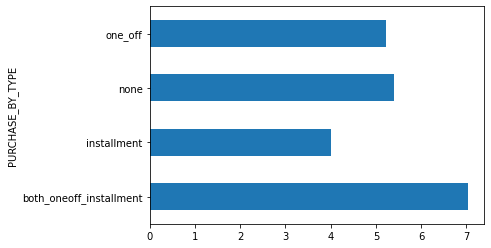

In [28]:
credit_card_data.groupby('PURCHASE_BY_TYPE').apply(lambda x: np.mean(x['PAYMENT_MIN_PAYMENT_RATIO'])).plot.barh()

### Insight 1

**Customers with installment purchases are paying dues**

## Average monthly cash advance for each purchse type.

Text(0.5, 1.0, 'Average cash advance taken by customers of each Purchase type')

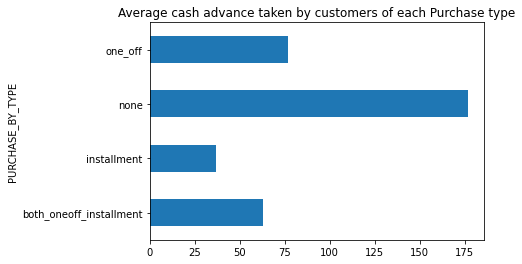

In [29]:
credit_card_data.groupby('PURCHASE_BY_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE'])).plot.barh()

plt.title('Average cash advance taken by customers of each Purchase type')

### Insight 2

**Customers who neither do one-off nor installment purchases take more cash on advance**

## Average limit usage for each purchse type.

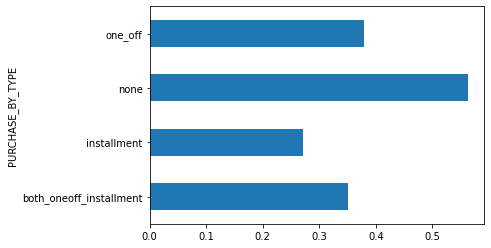

In [30]:
credit_card_data.groupby('PURCHASE_BY_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.barh()

### Insight 3

**Customers with installment purchases have good credit score**

# Creating Dummies & Normalizing the Data

## Creating Dummies

In [0]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
#    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [0]:
credit_data_dummy = create_dummies(credit_card_data , 'PURCHASE_BY_TYPE' )

In [33]:
credit_data_dummy.head()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MIN_PAYMENT_RATIO,PURCHASE_BY_TYPE_both_oneoff_installment,PURCHASE_BY_TYPE_installment,PURCHASE_BY_TYPE_none,PURCHASE_BY_TYPE_one_off
0,40.900749,0.818182,0.000000,0.000000,0,1000.0,95.4,139.509787,0.00,0.000000,201.802084,0.000000,95.40,0.166667,0.083333,2.0,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,6442.945483,0.250000,4,7000.0,0.0,1072.340217,0.00,0.000000,4103.032597,0.222222,0.00,0.000000,0.000000,0.0,12,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,0.000000,0.000000,0,7500.0,0.0,627.284787,773.17,1.000000,622.066742,0.000000,773.17,1.000000,0.000000,12.0,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,205.788017,0.083333,1,7500.0,0.0,312.343947,1499.00,0.083333,0.000000,0.000000,1499.00,0.083333,0.000000,1.0,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,0.000000,0.000000,0,1200.0,0.0,244.791237,16.00,0.083333,678.334763,0.000000,16.00,0.083333,0.000000,1.0,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [0]:
credit_data_pre = credit_data_dummy[credit_data_dummy.columns]

## Dropping columns that are used to derive KPI columns.

In [0]:
drop_cols=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']

In [0]:
credit_data_dummy.drop(drop_cols,axis=1, inplace=True)

In [37]:
credit_data_dummy.head()

,BALANCE_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MIN_PAYMENT_RATIO,PURCHASE_BY_TYPE_both_oneoff_installment,PURCHASE_BY_TYPE_installment,PURCHASE_BY_TYPE_none,PURCHASE_BY_TYPE_one_off
0,0.818182,0.000000,0,95.4,0.00,0.000000,0.166667,0.083333,2.0,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,0.909091,0.250000,4,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,1.000000,0.000000,0,0.0,773.17,1.000000,1.000000,0.000000,12.0,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,0.636364,0.083333,1,0.0,1499.00,0.083333,0.083333,0.000000,1.0,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,1.000000,0.000000,0,0.0,16.00,0.083333,0.083333,0.000000,1.0,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [38]:
credit_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   BALANCE_FREQUENCY                         8950 non-null   float64
 1   CASH_ADVANCE_FREQUENCY                    8950 non-null   float64
 2   CASH_ADVANCE_TRX                          8950 non-null   int64  
 3   INSTALLMENTS_PURCHASES                    8950 non-null   float64
 4   ONEOFF_PURCHASES                          8950 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY                8950 non-null   float64
 6   PURCHASES_FREQUENCY                       8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY          8950 non-null   float64
 8   PURCHASES_TRX                             8950 non-null   float64
 9   MONTHLY_AVG_PURCHASE                      8950 non-null   float64
 10  MONTHLY_CASH_ADVANCE                

In [39]:
credit_data_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.878083,0.234032,0.090909,0.888889,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.134017,0.195550,0.000000,0.000000,0.000000,0.222222,0.833333
CASH_ADVANCE_TRX,8950.0,3.079330,5.523724,0.000000,0.000000,0.000000,4.000000,29.000000
INSTALLMENTS_PURCHASES,8950.0,384.498368,676.271068,0.000000,0.000000,89.000000,468.637500,3886.240500
ONEOFF_PURCHASES,8950.0,536.493774,1096.913512,0.000000,0.000000,38.000000,577.405000,6689.898200
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
PURCHASES_TRX,8950.0,14.151385,20.962159,0.000000,1.000000,7.000000,17.000000,116.510000
MONTHLY_AVG_PURCHASE,8950.0,80.556556,129.758528,0.000000,3.399375,31.936667,97.228333,1422.256667


## Pairwise Correlation of all columns

In [40]:
credit_data_dummy.corr()

,BALANCE_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MIN_PAYMENT_RATIO,PURCHASE_BY_TYPE_both_oneoff_installment,PURCHASE_BY_TYPE_installment,PURCHASE_BY_TYPE_none,PURCHASE_BY_TYPE_one_off
BALANCE_FREQUENCY,1.000000,0.193894,0.162818,0.153734,0.137893,0.202845,0.232890,0.179472,0.212610,0.166118,0.090456,0.447093,-0.166862,0.194377,-0.132176,0.010821,-0.090963
CASH_ADVANCE_FREQUENCY,0.193894,1.000000,0.881092,-0.162397,-0.103046,-0.113575,-0.312493,-0.265907,-0.151307,-0.143088,0.670232,0.391003,-0.055547,-0.095419,-0.240403,0.379269,-0.026016
CASH_ADVANCE_TRX,0.162818,0.881092,1.000000,-0.111387,-0.067593,-0.081339,-0.238395,-0.200169,-0.096709,-0.096095,0.677050,0.325135,-0.043940,-0.051092,-0.200506,0.285854,-0.022655
INSTALLMENTS_PURCHASES,0.153734,-0.162397,-0.111387,1.000000,0.333809,0.248240,0.551693,0.634500,0.687538,0.700598,-0.104580,-0.089254,0.122056,0.434702,0.109896,-0.309136,-0.292610
ONEOFF_PURCHASES,0.137893,-0.103046,-0.067593,0.333809,1.000000,0.683819,0.349884,0.158892,0.630735,0.881978,-0.066403,-0.069823,0.167597,0.423637,-0.284287,-0.265931,0.096313
ONEOFF_PURCHASES_FREQUENCY,0.202845,-0.113575,-0.081339,0.248240,0.683819,1.000000,0.501343,0.142329,0.601289,0.606508,-0.105320,-0.099702,0.108821,0.525795,-0.394452,-0.368981,0.204113
PURCHASES_FREQUENCY,0.232890,-0.312493,-0.238395,0.551693,0.349884,0.501343,1.000000,0.862934,0.642234,0.504246,-0.245552,-0.217579,0.046166,0.515593,0.295918,-0.664037,-0.217147
PURCHASES_INSTALLMENTS_FREQUENCY,0.179472,-0.265907,-0.200169,0.634500,0.158892,0.142329,0.862934,1.000000,0.593674,0.396285,-0.206060,-0.174509,0.029464,0.463390,0.430024,-0.498338,-0.471909
PURCHASES_TRX,0.212610,-0.151307,-0.096709,0.687538,0.630735,0.601289,0.642234,0.593674,1.000000,0.768456,-0.118566,-0.064354,0.109957,0.552466,-0.066802,-0.367023,-0.178086
MONTHLY_AVG_PURCHASE,0.166118,-0.143088,-0.096095,0.700598,0.881978,0.606508,0.504246,0.396285,0.768456,1.000000,-0.079702,-0.086590,0.176530,0.497434,-0.154169,-0.337552,-0.052639


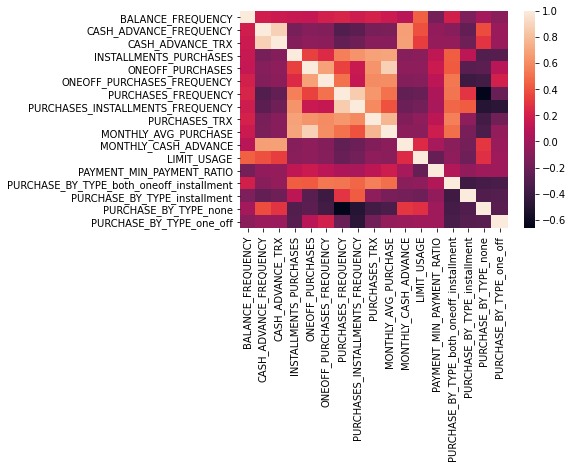

In [41]:
sns.heatmap(credit_data_dummy.corr())

## Standardizing Data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
credit_data_scaled = sc.fit_transform(credit_data_dummy)

In [45]:
credit_data_scaled.shape

(8950, 17)

# Applying PCA 

In [0]:
from sklearn.decomposition import PCA

In [0]:
var_ratio={}
for n in range(2,17):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(credit_data_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [48]:
var_ratio

{2: 0.4957864336213115,
 3: 0.619959487718599,
 4: 0.7003536996288348,
 5: 0.7700112235740714,
 6: 0.822017425279461,
 7: 0.8662470697021092,
 8: 0.8982256967914793,
 9: 0.9246228031037572,
 10: 0.9469876971962038,
 11: 0.9671739629064883,
 12: 0.9794731931149445,
 13: 0.9902955778540649,
 14: 0.9968096461530952,
 15: 0.9988785803163284,
 16: 1.0}

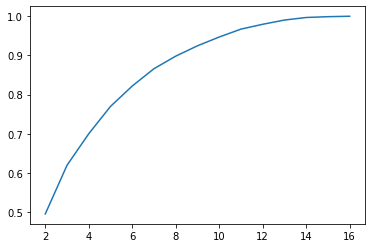

In [49]:
pd.Series(var_ratio).plot()

***Since 9 principal components are explaining about 92% variance so we select 9 principal components***

In [0]:
pc_final=PCA(n_components=9).fit(credit_data_scaled)

credit_data_reduced=pc_final.fit_transform(credit_data_scaled)

In [0]:
col_list=credit_data_dummy.columns

In [52]:
col_list

Index(['BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX',
       'MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE',
       'PAYMENT_MIN_PAYMENT_RATIO', 'PURCHASE_BY_TYPE_both_oneoff_installment',
       'PURCHASE_BY_TYPE_installment', 'PURCHASE_BY_TYPE_none',
       'PURCHASE_BY_TYPE_one_off'],
      dtype='object')

In [53]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(9)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
BALANCE_FREQUENCY,0.076693,0.257549,-0.185600,-0.503559,-0.087019,0.149316,0.437717,-0.276504,-0.474785
CASH_ADVANCE_FREQUENCY,-0.182811,0.425254,-0.190346,0.119233,0.227693,-0.073358,-0.027095,-0.018672,0.021743
CASH_ADVANCE_TRX,-0.152402,0.417529,-0.200181,0.156668,0.305387,-0.111766,-0.056132,-0.004255,0.023665
INSTALLMENTS_PURCHASES,0.310683,0.059927,-0.207240,0.136747,-0.068523,0.275172,-0.145528,0.537428,-0.373431
ONEOFF_PURCHASES,0.281517,0.228312,0.280847,0.065479,-0.006279,0.262842,-0.188554,-0.350273,0.261884
ONEOFF_PURCHASES_FREQUENCY,0.277153,0.210563,0.314966,-0.094492,0.080416,-0.174260,0.062713,-0.309302,0.021873
PURCHASES_FREQUENCY,0.363460,-0.061855,-0.188431,-0.091382,0.216411,-0.157138,0.156803,-0.158612,0.008548
PURCHASES_INSTALLMENTS_FREQUENCY,0.316500,-0.106233,-0.392287,0.008610,0.070199,-0.086853,0.074445,0.035040,-0.002657
PURCHASES_TRX,0.361314,0.156467,-0.036024,0.040205,-0.025701,0.140163,-0.119264,0.045230,-0.029670
MONTHLY_AVG_PURCHASE,0.346681,0.198549,0.113208,0.115310,-0.023625,0.341028,-0.219806,-0.001292,0.024536


In [54]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(9)])

PC_0    0.320469
PC_1    0.175317
PC_2    0.124173
PC_3    0.080394
PC_4    0.069658
PC_5    0.052006
PC_6    0.044230
PC_7    0.031979
PC_8    0.026397
dtype: float64

# Clustering

In [0]:
from sklearn.cluster import KMeans

## Identifying number of clusters through Elbow Analysis and Silhouette Coefficient

#### Elbow Analysis

In [0]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( credit_data_reduced )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [57]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

,num_clusters,cluster_errors
0,1,140681.359492
1,2,108029.732540
2,3,88300.611302
3,4,73864.057228
4,5,62847.644638
5,6,55134.563789
6,7,50650.231872
7,8,45844.982223
8,9,43163.087744
9,10,40652.984364


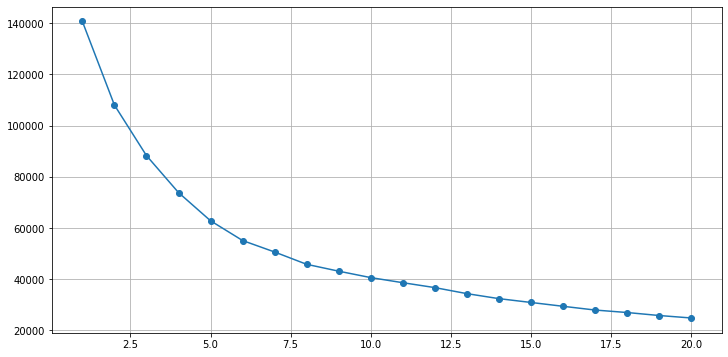

In [58]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

- Elbow Analysis shows that optimum number of clusters lies in range 4, 5, 6, 7

## Silhouette Coefficient

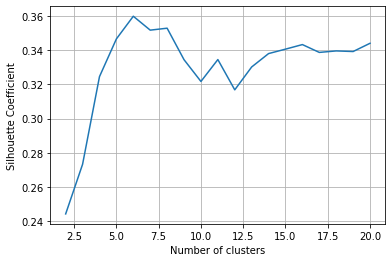

In [98]:
from sklearn import metrics

k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(credit_data_reduced)
    scores.append(metrics.silhouette_score(credit_data_reduced, km.labels_))

scores

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

- By combining results of Elbow analysis and Silhouette Coefficients, we find out that optimum number of clusters is 6

## Creating 6 Clusters Model

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans_6 = KMeans(n_clusters=6,random_state=123)

In [62]:
kmeans_6.fit(credit_data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

### Count number of records in each cluster

In [63]:
pd.Series(kmeans_6.labels_).value_counts()

4    2169
3    1991
2    1802
0    1662
5     702
1     624
dtype: int64

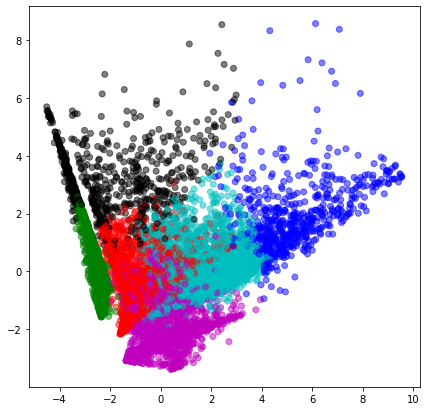

In [64]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in kmeans_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(credit_data_reduced[:,0],credit_data_reduced[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [0]:
df_pair_plot=pd.DataFrame(credit_data_reduced,columns=['PC_' +str(i) for i in range(9)])

In [0]:
df_pair_plot['Cluster']=kmeans_6.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


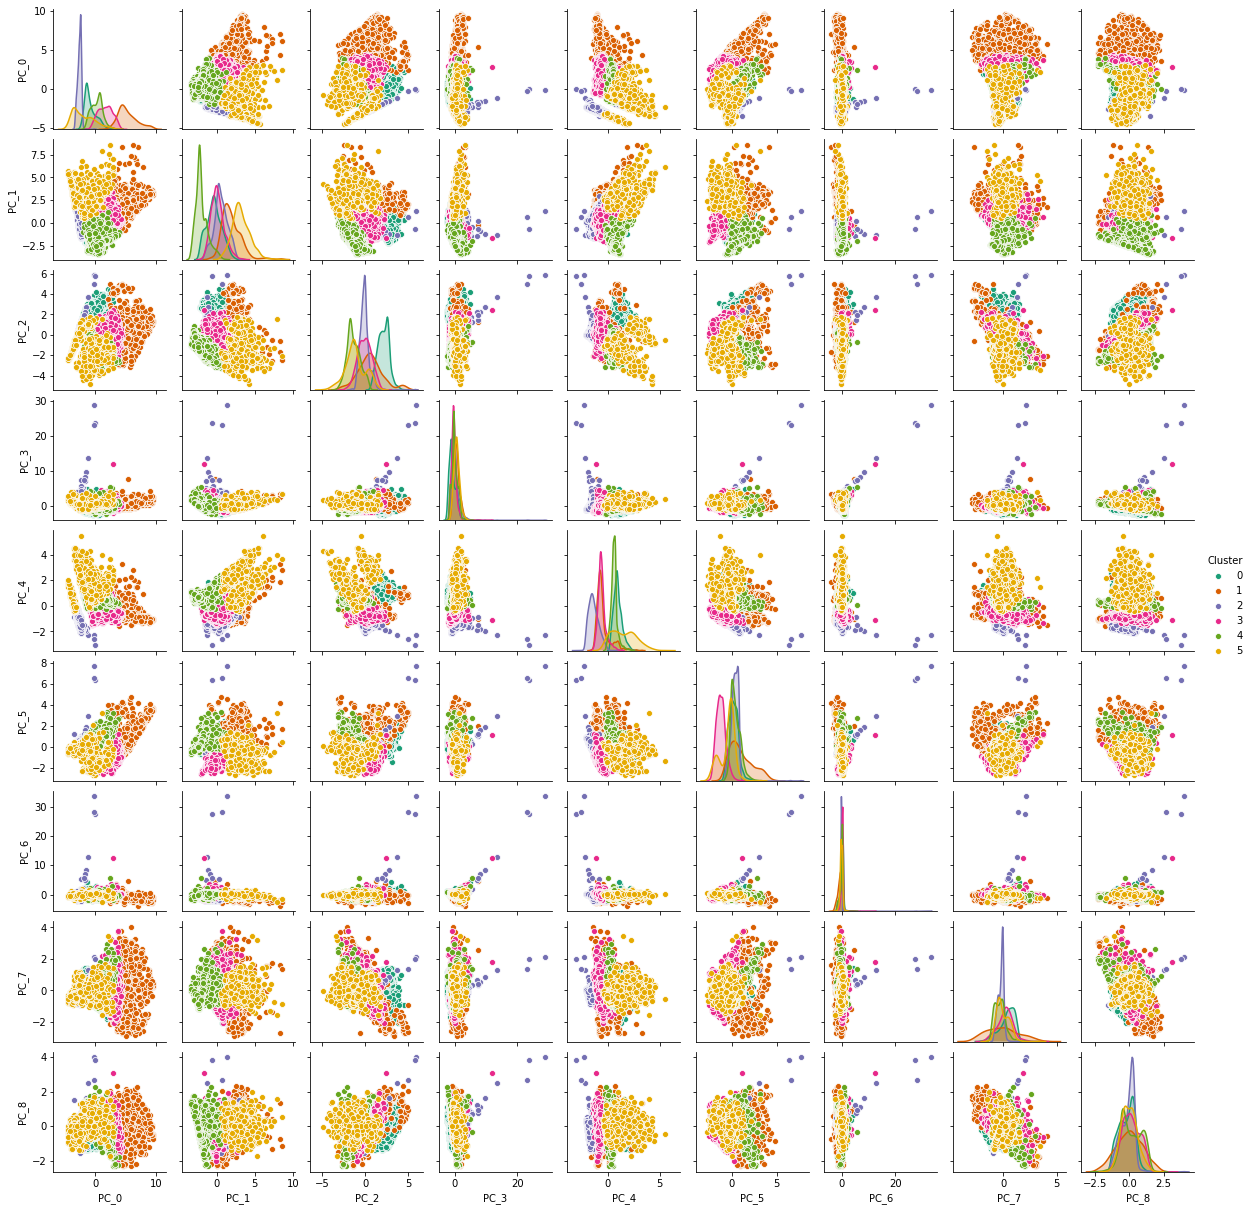

In [67]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### Key performance variable selection

Selecting variables which we will use in derving new KPIs. 
- We can take all variables but it will be difficult to interprate. So are are selecting less number of variables.

In [0]:
col_kpi=['PURCHASES_TRX','MONTHLY_AVG_PURCHASE','MONTHLY_CASH_ADVANCE','LIMIT_USAGE','CASH_ADVANCE_TRX',
         'PAYMENT_MIN_PAYMENT_RATIO','PURCHASE_BY_TYPE_both_oneoff_installment', 
         'PURCHASE_BY_TYPE_installment', 'PURCHASE_BY_TYPE_none',
         'PURCHASE_BY_TYPE_one_off','CREDIT_LIMIT']

### Concatenating Cluster labels with original data

In [0]:
cluster_df_6 = pd.concat([credit_data_pre[col_kpi],pd.Series(kmeans_6.labels_,name='Cluster_Label')],axis=1)

In [70]:
cluster_df_6.head()

,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,CASH_ADVANCE_TRX,PAYMENT_MIN_PAYMENT_RATIO,PURCHASE_BY_TYPE_both_oneoff_installment,PURCHASE_BY_TYPE_installment,PURCHASE_BY_TYPE_none,PURCHASE_BY_TYPE_one_off,CREDIT_LIMIT,Cluster_Label
0,2.0,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,4
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,0,1,0,7000.0,2
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,0
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,0,1,7500.0,0
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,0


### Analyzing 6 Cluster model

Mean value gives a good indication of the distribution of data. Finding mean value for each variable for each cluster

In [71]:
cluster_6=cluster_df_6.groupby('Cluster_Label').apply(lambda x: x[col_kpi].mean()).T
cluster_6

Cluster_Label,0,1,2,3,4,5
PURCHASES_TRX,6.289717,68.396426,0.006659,21.312662,11.608811,8.400285
MONTHLY_AVG_PURCHASE,57.953882,450.039545,0.017912,106.846273,44.173610,50.229888
MONTHLY_CASH_ADVANCE,40.158955,48.997843,131.450639,30.010873,21.779209,458.390282
LIMIT_USAGE,0.353996,0.333706,0.559974,0.334174,0.253836,0.607366
CASH_ADVANCE_TRX,1.453069,1.766026,4.311321,1.340532,0.649608,17.373219
PAYMENT_MIN_PAYMENT_RATIO,5.139508,13.278467,5.554213,5.577203,4.004540,3.984107
PURCHASE_BY_TYPE_both_oneoff_installment,0.000000,0.929487,0.000000,1.000000,0.000000,0.289174
PURCHASE_BY_TYPE_installment,0.000000,0.014423,0.003885,0.000000,1.000000,0.106838
PURCHASE_BY_TYPE_none,0.000000,0.000000,0.996115,0.000000,0.000000,0.351852
PURCHASE_BY_TYPE_one_off,1.000000,0.056090,0.000000,0.000000,0.000000,0.252137


In [72]:
# Percentage of each cluster in the total customer base
s=cluster_df_6.groupby('Cluster_Label').apply(lambda x: x['Cluster_Label'].value_counts())
# print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_6.shape[0])*100,name='Percentage')
print ("Cluster "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster 
   Size  Percentage
0  1662   18.569832
1   624    6.972067
2  1802   20.134078
3  1991   22.245810
4  2169   24.234637
5   702    7.843575


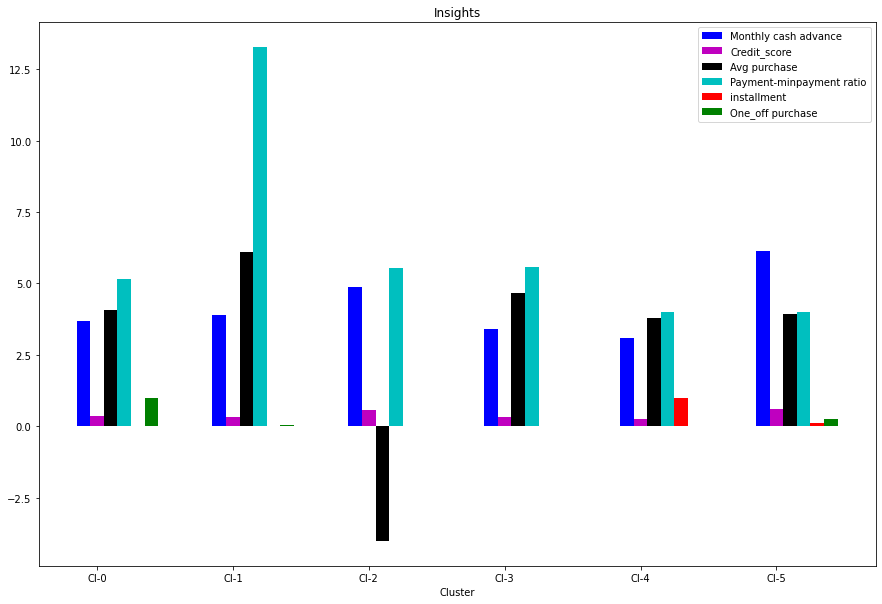

In [73]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_6.columns))

cash_advance=np.log(cluster_6.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_6.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_6.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_6.loc['PAYMENT_MIN_PAYMENT_RATIO',:].values
installment=cluster_6.loc['PURCHASE_BY_TYPE_installment',:].values
one_off=cluster_6.loc['PURCHASE_BY_TYPE_one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5'))
plt.legend()

**Cluster Cl-0 and Cluster Cl-3 are overlapping as these two clusters have almost same credit-score, monthly cash advance and payment-minpayment ratio**

## Creating 5 Clusters Model

In [0]:
kmeans_5 = KMeans(n_clusters=5,random_state=123)

In [75]:
kmeans_5.fit(credit_data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

### Count number of records in each cluster

In [76]:
pd.Series(kmeans_5.labels_).value_counts()

2    2250
3    2186
0    2123
1    1751
4     640
dtype: int64

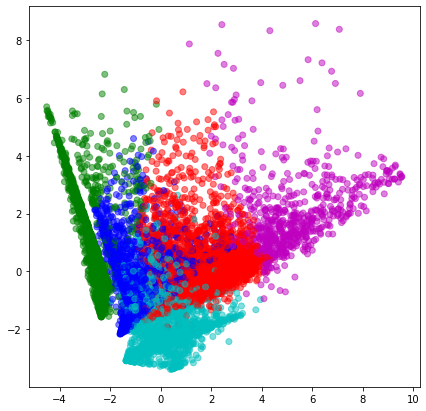

In [77]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m'}
label_color=[color_map[l] for l in kmeans_5.labels_]
plt.figure(figsize=(7,7))
plt.scatter(credit_data_reduced[:,0],credit_data_reduced[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [0]:
df_pair_plot=pd.DataFrame(credit_data_reduced,columns=['PC_' +str(i) for i in range(9)])

In [0]:
df_pair_plot['Cluster']=kmeans_5.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


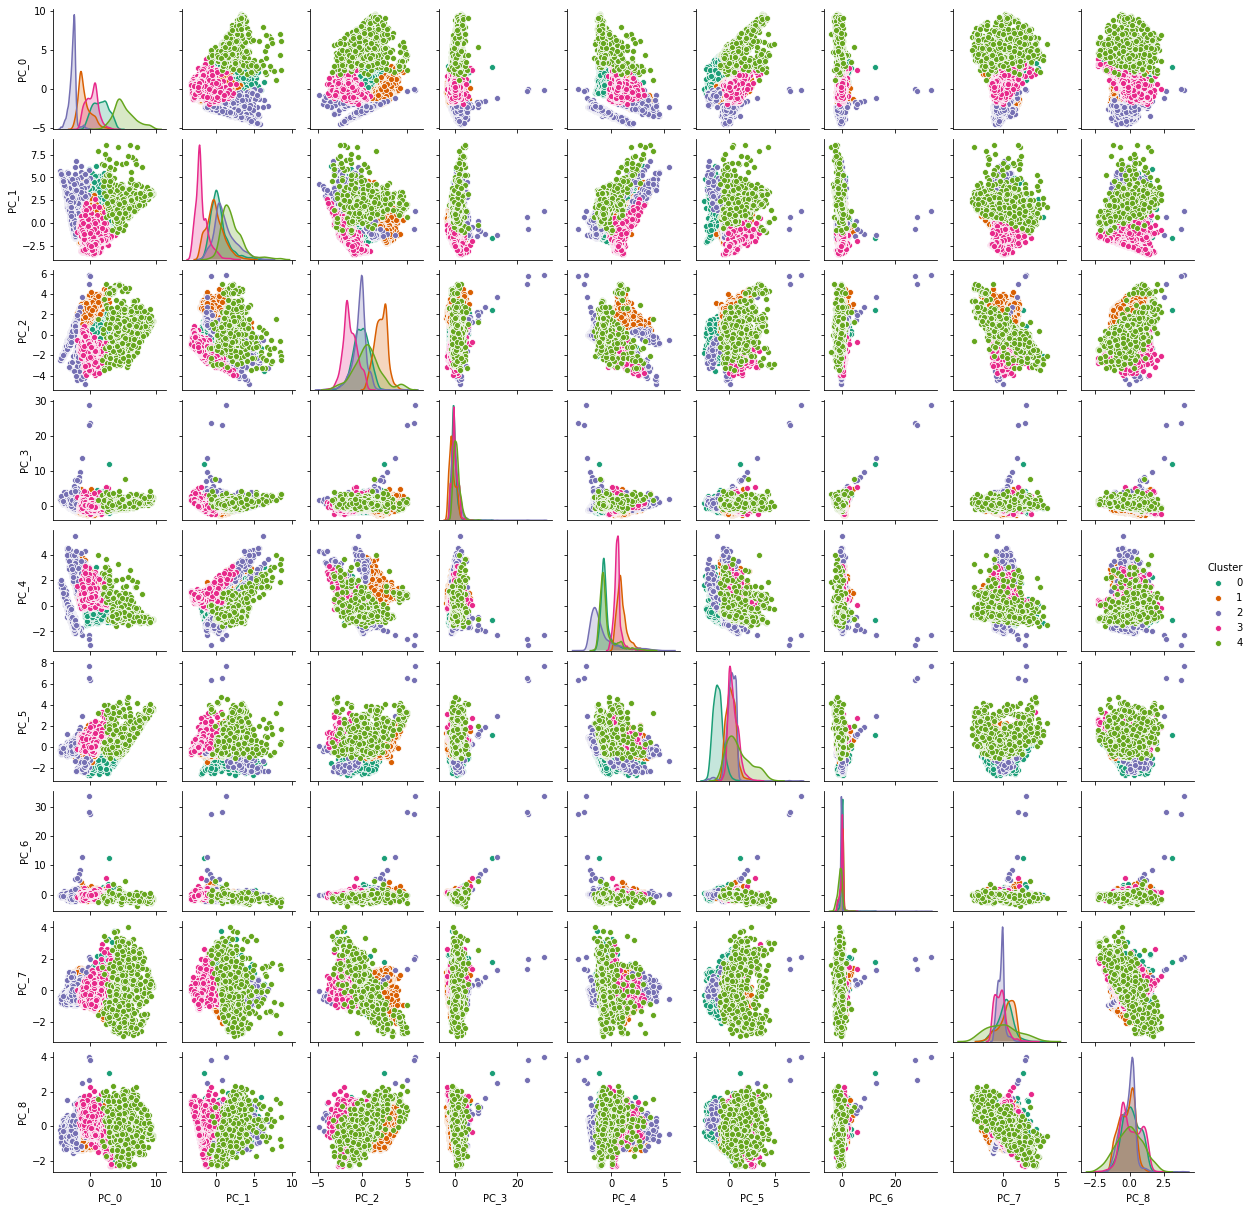

In [80]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### Concatenating Cluster labels with original data

In [0]:
cluster_df_5 = pd.concat([credit_data_pre[col_kpi],pd.Series(kmeans_5.labels_,name='Cluster_Label')],axis=1)

In [82]:
cluster_df_5.head()

,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,CASH_ADVANCE_TRX,PAYMENT_MIN_PAYMENT_RATIO,PURCHASE_BY_TYPE_both_oneoff_installment,PURCHASE_BY_TYPE_installment,PURCHASE_BY_TYPE_none,PURCHASE_BY_TYPE_one_off,CREDIT_LIMIT,Cluster_Label
0,2.0,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,0,1,0,7000.0,2
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,1
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,0,1,7500.0,1
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,1


### Analyzing 5 Cluster model

Mean value gives a good indication of the distribution of data. Finding mean value for each variable for each cluster

In [83]:
cluster_5=cluster_df_5.groupby('Cluster_Label').apply(lambda x: x[col_kpi].mean()).T
cluster_5

Cluster_Label,0,1,2,3,4
PURCHASES_TRX,21.342680,6.342381,0.510667,11.701057,67.986516
MONTHLY_AVG_PURCHASE,106.901039,58.529669,3.256331,44.479283,448.416188
MONTHLY_CASH_ADVANCE,51.787056,55.984367,203.772857,25.518839,63.637440
LIMIT_USAGE,0.349127,0.365246,0.572451,0.256768,0.340432
CASH_ADVANCE_TRX,2.297221,2.036551,7.085778,0.763952,2.350000
PAYMENT_MIN_PAYMENT_RATIO,5.452735,5.092396,5.229133,4.003803,13.144394
PURCHASE_BY_TYPE_both_oneoff_installment,1.000000,0.000000,0.024889,0.000000,0.929688
PURCHASE_BY_TYPE_installment,0.000000,0.000000,0.028889,1.000000,0.014063
PURCHASE_BY_TYPE_none,0.000000,0.000000,0.907556,0.000000,0.000000
PURCHASE_BY_TYPE_one_off,0.000000,1.000000,0.038667,0.000000,0.056250


In [84]:
# Percentage of each cluster in the total customer base
s=cluster_df_5.groupby('Cluster_Label').apply(lambda x: x['Cluster_Label'].value_counts())
# print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print ("Cluster "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster 
   Size  Percentage
0  2123   23.720670
1  1751   19.564246
2  2250   25.139665
3  2186   24.424581
4   640    7.150838


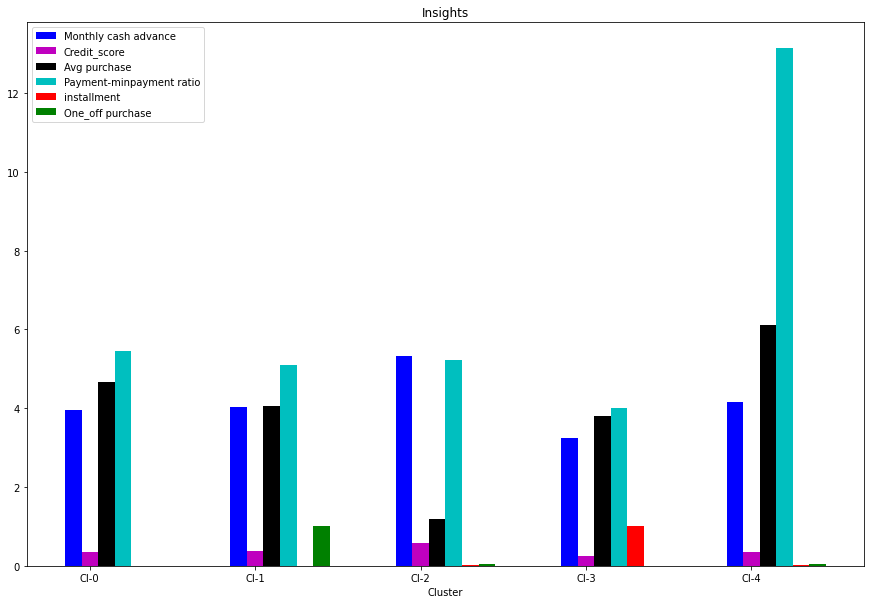

In [85]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_5.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_5.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_5.loc['PAYMENT_MIN_PAYMENT_RATIO',:].values
installment=cluster_5.loc['PURCHASE_BY_TYPE_installment',:].values
one_off=cluster_5.loc['PURCHASE_BY_TYPE_one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5'))
plt.legend()

**Cluster Cl-0 and Cluster Cl-1 are overlapping as these two clusters have almost same credit-score, monthly cash advance and payment-minpayment ratio**

## Creating 4 Clusters Model

In [0]:
kmeans_4 = KMeans(n_clusters=4,random_state=123)

In [87]:
kmeans_4.fit(credit_data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

### Count number of records in each cluster

In [88]:
pd.Series(kmeans_4.labels_).value_counts()

0    2497
2    2358
3    2198
1    1897
dtype: int64

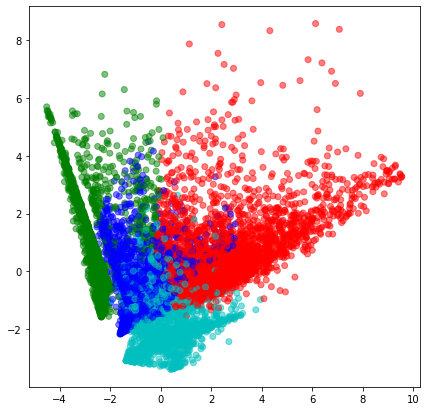

In [89]:
color_map={0:'r',1:'b',2:'g',3:'c'}
label_color=[color_map[l] for l in kmeans_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(credit_data_reduced[:,0],credit_data_reduced[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [0]:
df_pair_plot=pd.DataFrame(credit_data_reduced,columns=['PC_' +str(i) for i in range(9)])

In [0]:
df_pair_plot['Cluster']=kmeans_4.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


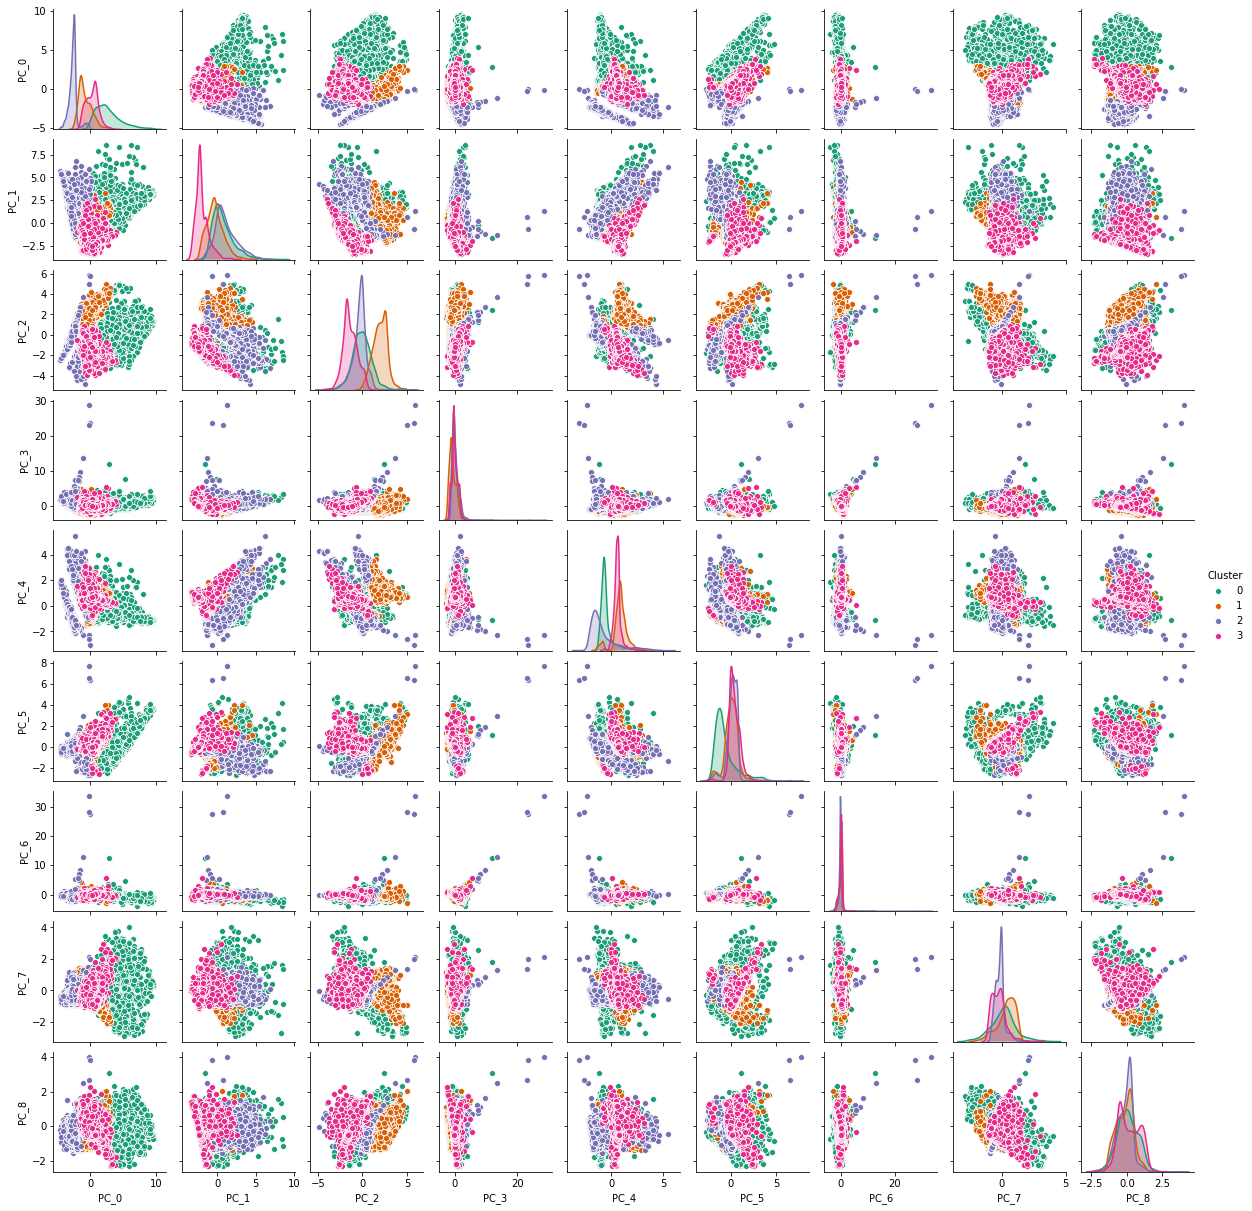

In [92]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### Concatenating Cluster labels with original data

In [0]:
cluster_df_4 = pd.concat([credit_data_pre[col_kpi],pd.Series(kmeans_4.labels_,name='Cluster_Label')],axis=1)

In [94]:
cluster_df_4.head()

,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,CASH_ADVANCE_TRX,PAYMENT_MIN_PAYMENT_RATIO,PURCHASE_BY_TYPE_both_oneoff_installment,PURCHASE_BY_TYPE_installment,PURCHASE_BY_TYPE_none,PURCHASE_BY_TYPE_one_off,CREDIT_LIMIT,Cluster_Label
0,2.0,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,0,1,0,7000.0,2
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,1
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,0,1,7500.0,1
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,1


### Analyzing 4 Cluster model

Mean value gives a good indication of the distribution of data. Finding mean value for each variable for each cluster

In [95]:
cluster_4=cluster_df_4.groupby('Cluster_Label').apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_Label,0,1,2,3
PURCHASES_TRX,34.858582,6.296526,0.844360,11.682216
MONTHLY_AVG_PURCHASE,199.859778,59.255125,5.080534,44.378725
MONTHLY_CASH_ADVANCE,52.301390,49.527425,205.238717,24.781906
LIMIT_USAGE,0.346605,0.353639,0.573436,0.254523
CASH_ADVANCE_TRX,2.176612,1.749077,7.296014,0.729299
PAYMENT_MIN_PAYMENT_RATIO,7.575128,5.051204,5.146176,3.999684
PURCHASE_BY_TYPE_both_oneoff_installment,0.985583,0.082762,0.058948,0.007734
PURCHASE_BY_TYPE_installment,0.003604,0.000000,0.029686,0.992266
PURCHASE_BY_TYPE_none,0.000000,0.000000,0.865988,0.000000
PURCHASE_BY_TYPE_one_off,0.010813,0.917238,0.045377,0.000000


In [96]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_Label').apply(lambda x: x['Cluster_Label'].value_counts())
# print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster 
   Size  Percentage
0  2497   27.899441
1  1897   21.195531
2  2358   26.346369
3  2198   24.558659


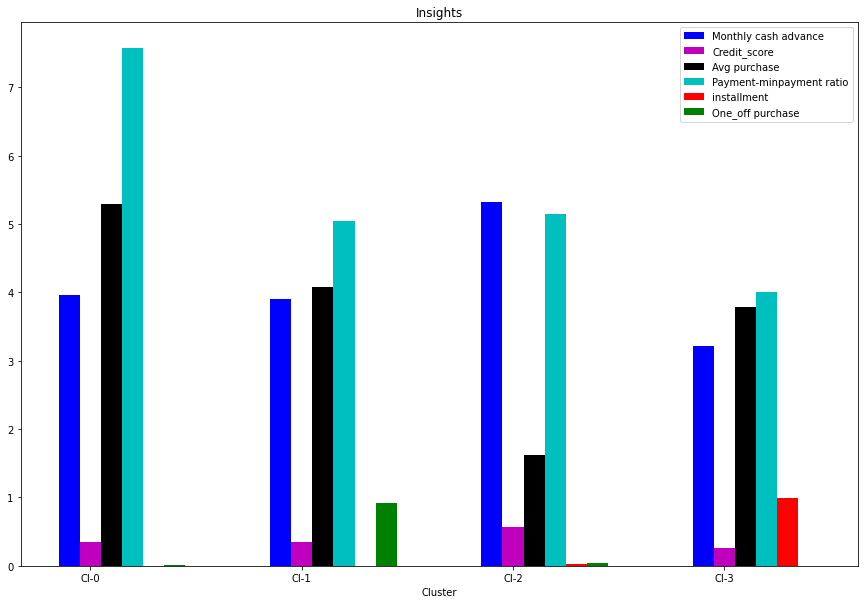

In [97]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_4.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_4.loc['PAYMENT_MIN_PAYMENT_RATIO',:].values
installment=cluster_4.loc['PURCHASE_BY_TYPE_installment',:].values
one_off=cluster_4.loc['PURCHASE_BY_TYPE_one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5'))
plt.legend()

## Insights with 4 Clusters Model

- Cluster 0 is the group of customers who have highest monthly average purchases and payment-min_payment ratio. They also have highest average amount per transaction and have comparitively good credit score. This group purchases on installments as well as do one_off purchases. ***This group is about 28% of the total customer base***

- Cluster 1 is the group of customers who are doing maximum one_off purchases. They have second highest monthly average purchases and are paying dues. They also have good credit score.***This group is about 21% of the total customer base***

- Cluster 2 is the group of customers who are taking maximum advance cash and are doing no purchase transaction. They also have the highest credit score. ***This group is about 26% of the total customer base***

- Cluster 3 is the group of customers who have the lowest credit score and payment-min_payment ratio. They are doing maximum installment purchases. ***This group is about 25% of the total customer base***

## Marketing Strategy Suggested
1. Group 0
- This group is performing best among all as cutomers doing maximum purchases and paying dues on time. They are also maintaining good credit score.
 - Giving rewards point will make them perform more purchases.

2. Group 1
- They are doing maximum one_off purchases. They are paying dues and doing high number of purchases and maintaining comparatively good credit score 
 - We can target them by providing less interest rate on purchase on installments.

3. Group 2
- They are potential target customers who are taking maximum cash advance and are doing no purchases. They are paying dues and have highest credit score 
 -    we can increase credit limit or can lower down interest rate
 -    Can be given premium card /loyality cards to increase purchase transactions

4.  Group 3
- This  group has the lowest credit score and are doing purchases on installments. They are also not paying their dues. This group seems to be risky group.